<a href="https://colab.research.google.com/github/betts-hannah/Final-Project--Hannah-Betts-and-Ben-Pintof-/blob/main/FinalProjectGraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# Hannah Betts and Ben Pintof
# Final Project
# Basketball Season Simulator
# Analyzing Graphs

# Importing the Packages
import pandas as pd
import numpy as np
import math as ma
import random as rand
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in each csv
TeamsTable = pd.read_csv('Pintof_Betts_Teams.csv')
PlayersTable = pd.read_csv('Pintof_Betts_Drafted_Players_Table.csv')
GLTeam = pd.read_csv('Pintof_Betts_Game_Log_Team.csv')
GLPlayer = pd.read_csv('Pintof_Betts_Game_Log_Player.csv')
PlayerBins = pd.read_csv('Pintof_Betts_Player_Bins.csv')
PerGameStats = pd.read_csv('Pintof_Betts_Stats.csv')

# Different Graphs
# 1. PPG vs APG
# 2. Win % vs Team PPG
# 3. Win % vs Team Allowed PPG
# 4. Playoff PPG vs Regular Season PPG
# 5. Compare East vs West Wins


In [ ]:
# Graphing Section

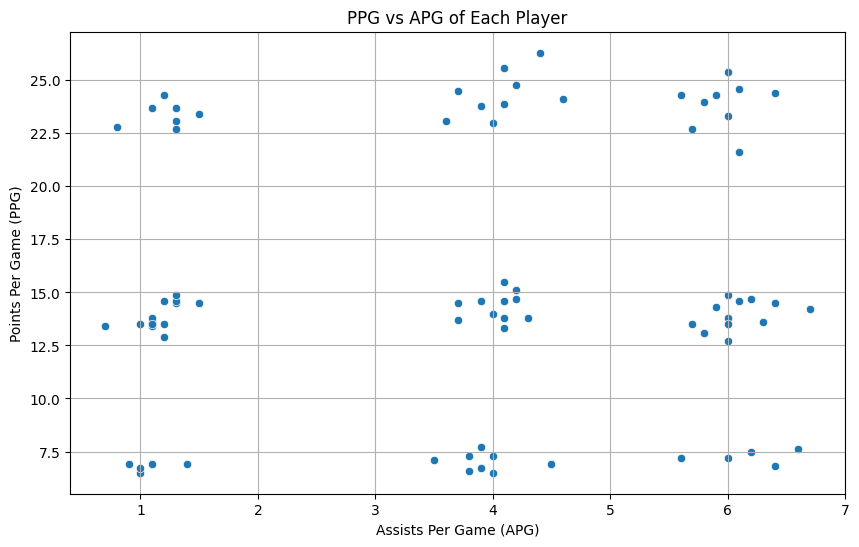

In [ ]:
# 1. PPG vs APG
# PPG vs APG of each player using the PerGameStats
plt.figure(figsize=(10, 6))
sns.scatterplot(x='APG', y='PPG', data=PerGameStats)
plt.title('PPG vs APG of Each Player')
plt.xlabel('Assists Per Game (APG)')
plt.ylabel('Points Per Game (PPG)')
plt.grid(True)
plt.show()

In [ ]:
def TeamPPG(Team):
  TeamPointsPG = 0
  for i in range(len(GLTeam)):
    if GLTeam.loc[i, "Team"] == Team:
      x = GLTeam.loc[i, "Points"]
      TeamPointsPG += x
  return TeamPointsPG
def TeamPPGAllowed(Team):
  TeamPointsAllowedPG = 0
  for i in range(len(GLTeam)):
    if GLTeam.loc[i, "Team"] == Team:
      y = GLTeam.loc[i, "Points Allowed"]
      TeamPointsAllowedPG += y
  return TeamPointsAllowedPG
TeamsTable["PPG"] = round(TeamsTable["Team_Abbreviation"].apply(TeamPPG) / TeamsTable["GamesPlayed"], 2)
TeamsTable["PPGAllowed"] = round(TeamsTable["Team_Abbreviation"].apply(TeamPPGAllowed) / TeamsTable["GamesPlayed"], 2)

In [ ]:
# Team progression throughout the year
sub = pd.crosstab((), TeamsTable["Team_Abbreviation"])
sub.plot.line(stacked=True,  title="Class Type of Vehicle by Maker",ylabel="Count")

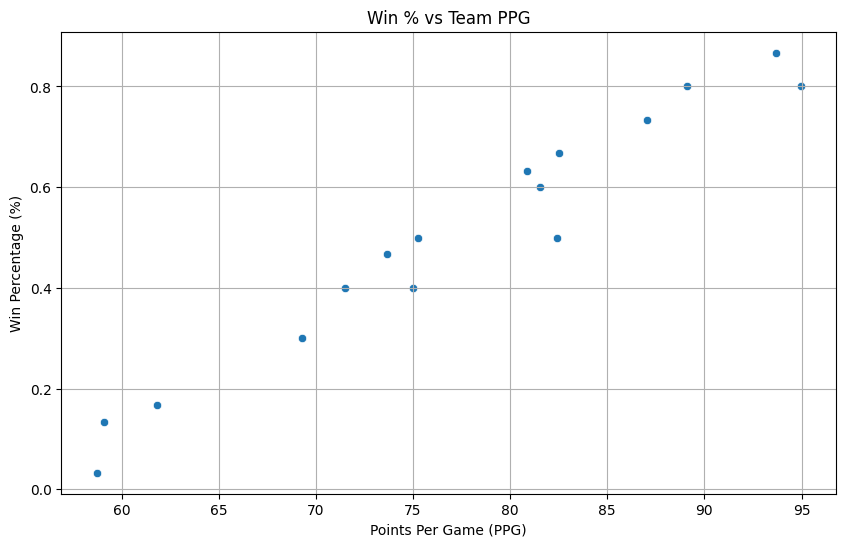

In [ ]:
# Win % vs Team PPG
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PPG', y='Wpercentage', data=TeamsTable)
plt.title('Win % vs Team PPG')
plt.xlabel('Points Per Game (PPG)')
plt.ylabel('Win Percentage (%)')
plt.grid(True)
plt.show()

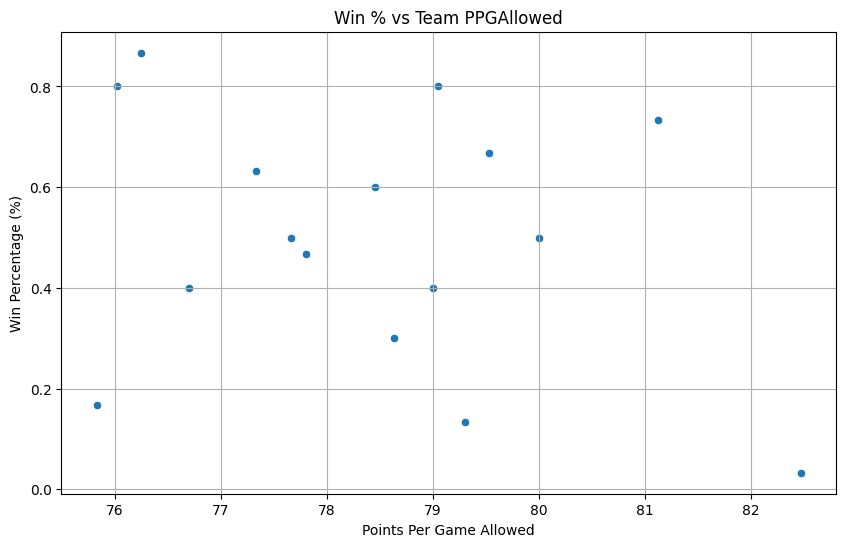

In [26]:
# Win % vs Team Allowed PPG
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PPGAllowed', y='Wpercentage', data=TeamsTable)
plt.title('Win % vs Team PPGAllowed')
plt.xlabel('Points Per Game Allowed')
plt.ylabel('Win Percentage (%)')
plt.grid(True)
plt.show()

In [37]:
def RegularSeasonPPG(Player):
  RegPlayerPointsPG = 0
  for i in range(len(GLPlayer)):
    if GLPlayer.loc[i, "Name"] == Player:
      if GLPlayer.loc[i, "Playoff"] == "No":
        y = GLPlayer.loc[i, "Points"]
        RegPlayerPointsPG += y
  return RegPlayerPointsPG
def PostseasonPPG(Player):
  OffPlayerPointsPG = 0
  for i in range(len(GLPlayer)):
    if GLPlayer.loc[i, "Name"] == Player:
      if GLPlayer.loc[i, "Playoff"] == "Yes":
        # Changed from GLPlayer[i, "Points"] to GLPlayer.loc[i, "Points"]
        x = GLPlayer.loc[i, "Points"]
        OffPlayerPointsPG += x
  return OffPlayerPointsPG
PerGameStats["RegularSeasonPPG"] = round(PlayersTable["Name"].apply(RegularSeasonPPG) / PlayersTable["Games_Played"], 2)
PerGameStats["OffSeasonPPG"] = round(PlayersTable["Name"].apply(PostseasonPPG) / PlayersTable["Games_Played"], 2)

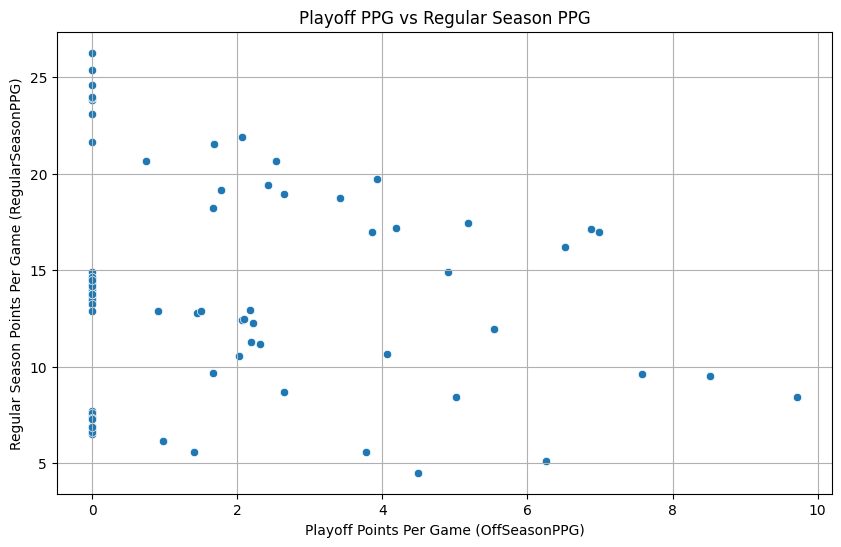

In [41]:
# Playoff PPG vs Regular Season PPG
plt.figure(figsize=(10, 6))
sns.scatterplot(x='OffSeasonPPG', y='RegularSeasonPPG', data=PerGameStats)
plt.title('Playoff PPG vs Regular Season PPG')
plt.xlabel('Playoff Points Per Game (OffSeasonPPG)')
plt.ylabel('Regular Season Points Per Game (RegularSeasonPPG)')
plt.grid(True)
plt.show()

[Text(0.5, 0, 'Conference'),
 Text(0, 0.5, 'Wins'),
 Text(0.5, 1.0, 'What Conference had more Wins')]

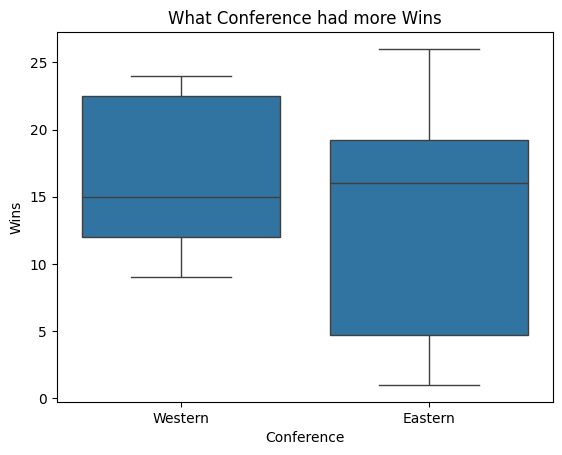

In [ ]:
# Eastern and Western Conference Wins comparison
sns.boxplot(data=TeamsTable, x="Conference", y="Wins").set(
    xlabel="Conference", ylabel="Wins", title="What Conference had more Wins")